In [12]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load Data

In [2]:
data,target = load_breast_cancer(return_X_y=True, as_frame=True)
data.head()
# data.shape #(n_samples,n_features)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
target.head() # 0 is malignant, 1 is benign

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

# Simple Visualization 

In [32]:
data_two_features = data.iloc[:,:2]
data_two_features.head()


,mean radius,mean texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34


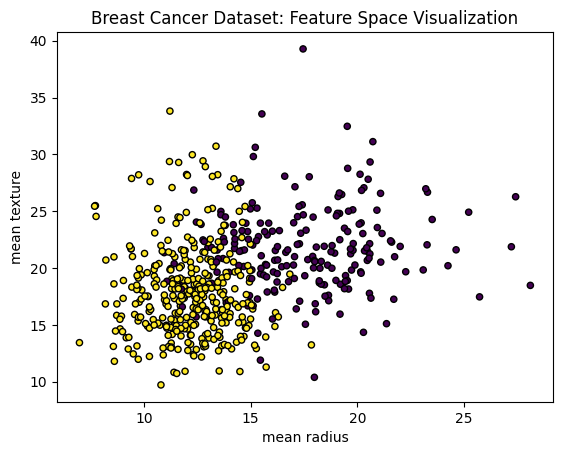

In [33]:
plt.scatter(data.iloc[:,0],data.iloc[:,1],c=target,s=20,edgecolors="k")

plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.title("Breast Cancer Dataset: Feature Space Visualization")

plt.show()

In [65]:
# Train SVM
svm = SVC(kernel='linear')
svm.fit(data_two_features,target)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


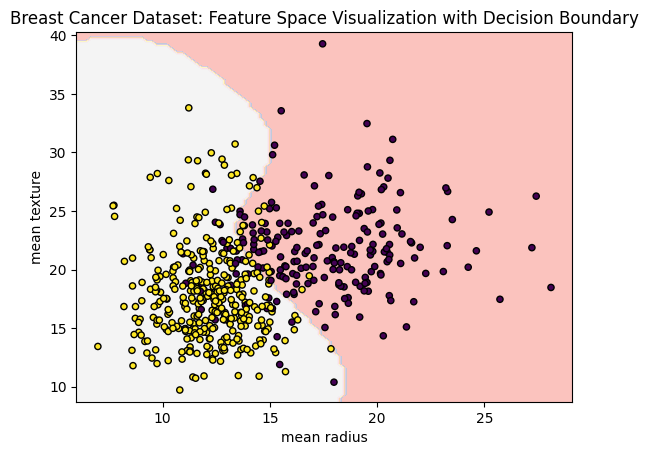

In [68]:
# Visualize SVM Decision boundary
# Draw prediction regions
DecisionBoundaryDisplay.from_estimator(
    svm,
    data_two_features,
    response_method = "predict", # hard class labels (0/1)
    alpha = 0.8,
    cmap = "Pastel1",
    xlabel = data_two_features.columns[0],
    ylabel = data_two_features.columns[1],
)

plt.scatter(data_two_features.iloc[:,0],
    data_two_features.iloc[:,1],
    c=target
    ,s=20,
    edgecolors="k")

plt.xlabel(data_two_features.columns[0])
plt.ylabel(data_two_features.columns[1])
plt.title("Breast Cancer Dataset: Feature Space Visualization with Decision Boundary")

plt.show()

In [67]:
svm = SVC(kernel="rbf")
svm.fit(data_two_features,target)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [38]:
svm= SVC(kernel="poly", degree=3)
svm.fit(data_two_features,target)

,C,1.0
,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


# Train-test Split & Standardization

In [22]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    data,target,test_size=0.2,random_state=42
)

In [18]:
#sanity check
X_train.shape #(455,30)
y_train.shape #(455,)
X_test.shape #(114,30)
y_test.shape #(114,)

(114,)

In [24]:
# Standardization
scaler = StandardScaler() 
X_train_scaled = scaler.fit_transform(X_train) # fit only on train set
X_test_scaled = scaler.transform(X_test) # transfrom test set

# EDA 

In [ ]:
from sklearn.decomposition import PCA

X_scaled = StandardScaler().fit_transform(data)
pca = PCA(n_components=2) #compress 30 features into 2 components
X_pca = pca.fit_transform(X_scaled)


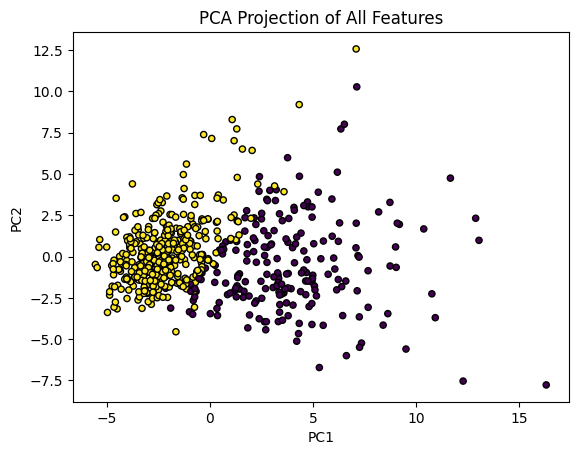

In [45]:
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=target, s=20, edgecolors='k')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Projection of All Features")
plt.show()

# We cannot directly visualize high-dimensional data, 
# so we project all features into a lower-dimensional space using PCA 
# while preserving most of the variance.

# Train SVM on all features 

## Linear SVM

In [57]:
# Train linear SVM
svm_train_linear = SVC(kernel='linear')
svm_train_linear.fit(X_train_scaled,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [58]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = svm_train_linear.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.956140350877193
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



## RBF SVM

In [59]:
svm_train_rbf = SVC(kernel="rbf")
svm_train_rbf.fit(X_train_scaled,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [60]:
y_pred = svm_train_rbf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9824561403508771
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## Cubic Polynomial SVM

In [54]:
svm_train_poly = SVC(kernel="poly",degree=3)
svm_train_poly.fit(X_train_scaled,y_train)

,C,1.0
,kernel,'poly'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [61]:
y_pred = svm_train_poly.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.868421052631579
              precision    recall  f1-score   support

           0       1.00      0.65      0.79        43
           1       0.83      1.00      0.90        71

    accuracy                           0.87       114
   macro avg       0.91      0.83      0.85       114
weighted avg       0.89      0.87      0.86       114



# Train SVM in PCA space 

In [62]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [63]:
svm_pca = SVC(kernel="linear",C=1)
svm_pca.fit(X_train_pca,y_train)

,C,1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [64]:
y_pred = svm_pca.predict(X_test_pca)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9912280701754386
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



## Visualize Decision Boundary

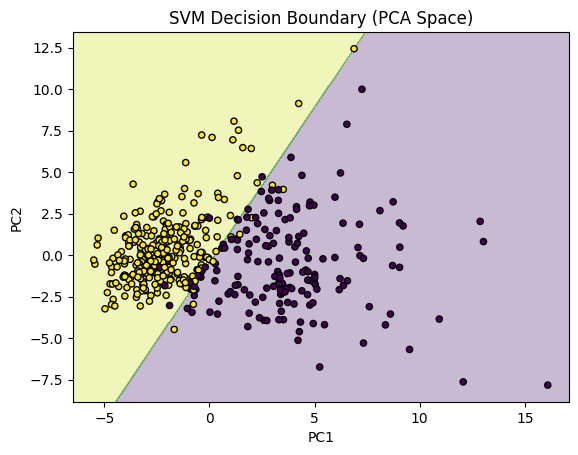

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Create mesh grid
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 500),
    np.linspace(y_min, y_max, 500)
)

Z = svm_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1],
            c=y_train, s=20, edgecolors='k')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("SVM Decision Boundary (PCA Space)")
plt.show()


In [ ]:
## Train the SVM on the original feature space to preserve predictive power 
# and evaluate it on a held-out test set. 
# PCA is used separately for visualization by projecting the data into 
# two dimensions, where I train a secondary SVM purely to
# illustrate the decision boundary.